# DC HOUSING INVENTORY 

### Technique: Keras Regression

### Objective: The DC Residential Properties data set lists 158,957 housing units built between 1754 and 2018. I seek to predict sale price using a regression model that incorporates deep neural networks.   

#### Features: 

* INDEX - Unique identifier for each residential property 
* BATHRM - Number of Full Bathrooms
* HF_BATHRM - Number of Half Bathrooms (no bathtub or shower)
* HEAT - Heating System Type
* AC - Cooling System 
* NUM_UNITS - Number of Units
* ROOMS - Number of Rooms
* BEDRM - Number of Bedrooms
* AYB - Year the main portion of the building was built
* YR_RMDL - Year the structure was remodeled
* EYB - Year an improvement was built 
* STORIES - Number of stories in primary dwelling
* SALEDATE - Date of most recent sale
* PRICE - Price at most recent sale
* QUALIFIED - Qualified (binary assignment of 'U' or 'Q')
* SALE_NUM - Number of times sold
* GBA - Gross building area in square feet
* BLDG_NUM - Building Number on Property
* STYLE - Style type
* STRUCTS - Structure type
* GRADE - Description of quality 
* CNDTN - Description of condition
* EXTWALL - Extrerior wall type
* ROOF - Roof type
* INTWALL - Interior wall type
* KITCHENS - Number of kitchens
* FIREPLACES - Number of fireplaces
* USECODE - Property use code
* LANDAREA - Land area of property in square feet
* GIS_LAST_MOD_DTTM - Last Modified Date
* SOURCE - Raw Data Source (Residential or Condo)
* CMPLX_NUM - Complex number
* LIVING_GBA - Gross building area in square feet
* FULLADDRESS - Street Address
* CITY - City
* STATE - State
* ZIPCODE - Zip Code
* NATIONALGRID - National grid coordinate spatial address
* LATITUDE - Latitude
* LONGITUDE - Longitude
* ASSESSMENT_NBHD - Neighborhood ID
* ASSESSMENT_SUBNBHD - Subneighborhood ID
* CENSUS_TRACT - Census tract
* CENSUS_BLOCK - Census block
* WARD - Ward (8 districts in the city with changing boudaries)
* SQUARE - Square (location)
* X - Longitude
* Y - Latitude
* QUADRANT - City quadrant (NE,SE,SW,NW)

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_palette("husl")
sns.set(style="darkgrid")
%matplotlib inline

In [128]:
df = pd.read_csv('DC_Properties.csv')

## Data Preprocessing

In [129]:
df.shape

(158957, 49)

### Missing Values

This data set is an inventory of ALL residential properties in Washinton D.C. In order to predict sale price, we need the subset of properties that have been sold. 

In [130]:
df.dropna(how='any', subset=['PRICE'], inplace=True)

In [131]:
df.shape

(98216, 49)

Dropping observations with missing values in the 'PRICE' column leaves us with just over 98,000 records. We want to preserve as many of these as possible. The next step is to examine the profile of missing values in the rest of the data set. 

In [132]:
df.isnull().sum()

INDEX                     0
BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             40316
ROOMS                     0
BEDRM                     0
AYB                     112
YR_RMDL               40542
EYB                       0
STORIES               40349
SALEDATE                  1
PRICE                     0
QUALIFIED                 0
SALE_NUM                  0
GBA                   40316
BLDG_NUM                  0
STYLE                 40316
STRUCT                40316
GRADE                 40316
CNDTN                 40316
EXTWALL               40316
ROOF                  40316
INTWALL               40316
KITCHENS              40317
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
CMPLX_NUM             57900
LIVING_GBA            57900
FULLADDRESS           40651
CITY                  40647
STATE               

In [133]:
df = df.drop('BLDG_NUM',axis=1)
df = df.drop('INDEX',axis=1)
df = df.drop('GIS_LAST_MOD_DTTM',axis=1)
df = df.drop('CMPLX_NUM',axis=1)
df = df.drop('LIVING_GBA',axis=1)
df = df.drop('FULLADDRESS',axis=1)
df = df.drop('CITY',axis=1)
df = df.drop('STATE',axis=1)
df = df.drop('NATIONALGRID',axis=1)
df = df.drop('ASSESSMENT_SUBNBHD',axis=1)
df = df.drop('CENSUS_TRACT',axis=1)
df = df.drop('CENSUS_BLOCK',axis=1)
df = df.drop('SQUARE',axis=1)
df = df.drop('Y',axis=1)
df = df.drop('X',axis=1)

In [134]:
df.isnull().sum()

BATHRM                 0
HF_BATHRM              0
HEAT                   0
AC                     0
NUM_UNITS          40316
ROOMS                  0
BEDRM                  0
AYB                  112
YR_RMDL            40542
EYB                    0
STORIES            40349
SALEDATE               1
PRICE                  0
QUALIFIED              0
SALE_NUM               0
GBA                40316
STYLE              40316
STRUCT             40316
GRADE              40316
CNDTN              40316
EXTWALL            40316
ROOF               40316
INTWALL            40316
KITCHENS           40317
FIREPLACES             0
USECODE                0
LANDAREA               0
SOURCE                 0
ZIPCODE                0
LATITUDE               0
LONGITUDE              0
ASSESSMENT_NBHD        0
WARD                   0
QUADRANT             101
dtype: int64

## Additional Features

* NUM_UNITS
* STORIES
* GBA
* STYLE
* STRUCT
* GRADE
* CNDTN
* EXTWALL
* ROOF
* INTWALL
* KITCHENS

In [135]:
df['NUM_UNITS'].value_counts()

1.0    49339
2.0     6050
4.0     1862
3.0      590
0.0       51
5.0        5
6.0        3
Name: NUM_UNITS, dtype: int64

In [136]:
units_dummies = pd.get_dummies(df['NUM_UNITS'],drop_first=True)

In [137]:
df = pd.concat([df.drop('NUM_UNITS',axis=1),units_dummies],axis=1)

In [138]:
df['STORIES'].value_counts()

2.0      46064
3.0       9109
1.0       2330
4.0        311
9.0         15
0.0         13
5.0          9
6.0          5
25.0         4
275.0        2
7.0          1
250.0        1
826.0        1
20.0         1
8.0          1
Name: STORIES, dtype: int64

In [139]:
stories = {'STORIES': {25.0: 0, 275.0: 0, 250.0: 0, 826.0: 0, 20.0:0}}

In [140]:
df.replace(stories, inplace=True)

In [141]:
df = df[df.STORIES != '0']

In [142]:
df['STORIES'].value_counts()

2.0    46064
3.0     9109
1.0     2330
4.0      311
0.0       22
9.0       15
5.0        9
6.0        5
7.0        1
8.0        1
Name: STORIES, dtype: int64

In [143]:
stories_dummies = pd.get_dummies(df['STORIES'],drop_first=True)

In [144]:
df = pd.concat([df.drop('STORIES',axis=1),stories_dummies],axis=1)

# drop GBA for now 

In [145]:
df['GBA'].value_counts()

1152.0    817
1088.0    749
1024.0    671
832.0     660
1280.0    537
         ... 
3745.0      1
5260        1
3536        1
3755.0      1
2527        1
Name: GBA, Length: 6153, dtype: int64

In [147]:
df = df.drop('GBA',axis=1)

In [148]:
df['STYLE'].value_counts()

2 Story            44150
3 Story             5596
2.5 Story Fin       3920
1 Story             2000
1.5 Story Fin       1158
2.5 Story Unfin      380
4 Story              231
Split Level          158
Split Foyer          123
3.5 Story Fin         84
1.5 Story Unfin       54
Default               23
Bi-Level               8
3.5 Story Unfin        5
4.5 Story Fin          5
4.5 Story Unfin        2
Vacant                 2
Outbuildings           1
Name: STYLE, dtype: int64

In [149]:
style_dummies = pd.get_dummies(df['STYLE'],drop_first=True)

In [150]:
df = pd.concat([df.drop('STYLE',axis=1),style_dummies],axis=1)

In [151]:
df['STRUCT'].value_counts()

Row Inside       23425
Single           16248
Semi-Detached     8209
Row End           6906
Multi             2843
Town Inside        185
Town End            77
Default              7
Name: STRUCT, dtype: int64

In [152]:
struct_dummies = pd.get_dummies(df['STRUCT'],drop_first=True)

In [153]:
df = pd.concat([df.drop('STRUCT',axis=1),struct_dummies],axis=1)

In [154]:
df['GRADE'].value_counts()

Average          19664
Above Average    17321
Good Quality     11752
Very Good         5008
Excellent         1825
Superior          1523
Exceptional-A      473
Exceptional-B      168
Fair Quality        83
Exceptional-C       44
Exceptional-D       32
Low Quality          4
No Data              3
Name: GRADE, dtype: int64

In [155]:
grade_dummies = pd.get_dummies(df['GRADE'],drop_first=True)

In [156]:
df = pd.concat([df.drop('GRADE',axis=1),grade_dummies],axis=1)

In [157]:
df['CNDTN'].value_counts()

Good         25711
Average      24013
Very Good     6681
Excellent      889
Fair           509
Poor            93
Default          4
Name: CNDTN, dtype: int64

In [158]:
condition_dummies = pd.get_dummies(df['CNDTN'],drop_first=True)

In [159]:
df = pd.concat([df.drop('CNDTN',axis=1),condition_dummies],axis=1)

In [160]:
df['EXTWALL'].value_counts()

Common Brick      43369
Brick/Siding       3526
Vinyl Siding       3169
Wood Siding        2273
Stucco             1652
Brick Veneer        593
Shingle             533
Aluminum            461
Face Brick          420
Brick/Stucco        401
Brick/Stone         386
Stone               371
Stone/Siding        214
Stone/Stucco        156
Stone Veneer        148
Hardboard            79
Concrete             40
Concrete Block       35
Stucco Block         28
Metal Siding         28
Default              12
Plywood               4
Adobe                 1
SPlaster              1
Name: EXTWALL, dtype: int64

In [161]:
extwall_dummies = pd.get_dummies(df['EXTWALL'],drop_first=True)

In [162]:
df = pd.concat([df.drop('EXTWALL',axis=1),extwall_dummies],axis=1)

In [163]:
df['ROOF'].value_counts()

Built Up          17633
Metal- Sms        16338
Comp Shingle      16170
Slate              5583
Neopren             903
Shake               383
Clay Tile           309
Shingle             248
Metal- Pre          139
Typical              91
Composition Ro       63
Metal- Cpr           20
Concrete Tile        11
Wood- FS              4
Water Proof           4
Concrete              1
Name: ROOF, dtype: int64

In [164]:
roof_dummies = pd.get_dummies(df['ROOF'],drop_first=True)

In [165]:
df = pd.concat([df.drop('ROOF',axis=1),roof_dummies],axis=1)

In [166]:
df['INTWALL'].value_counts()

Hardwood         44180
Hardwood/Carp     7511
Wood Floor        4014
Carpet            2014
Lt Concrete         50
Default             41
Ceramic Tile        39
Vinyl Comp          21
Parquet             11
Resiliant            8
Vinyl Sheet          8
Terrazo              3
Name: INTWALL, dtype: int64

In [167]:
intwall_dummies = pd.get_dummies(df['INTWALL'],drop_first=True)

In [168]:
df = pd.concat([df.drop('INTWALL',axis=1),intwall_dummies],axis=1)

In [169]:
df['KITCHENS'].value_counts()

1.0     47704
2.0      7656
4.0      1859
3.0       627
0.0        43
5.0         5
6.0         4
44.0        1
Name: KITCHENS, dtype: int64

In [170]:
kitch = {'KITCHENS': {44.0: 0}}

In [171]:
df.replace(kitch, inplace=True)

In [172]:
kitch_dummies = pd.get_dummies(df['KITCHENS'],drop_first=True)

In [173]:
df = pd.concat([df.drop('KITCHENS',axis=1),kitch_dummies],axis=1)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98216 entries, 0 to 98215
Columns: 135 entries, BATHRM to 6.0
dtypes: float64(6), int64(9), object(8), uint8(112)
memory usage: 28.5+ MB


# This is not working

In [182]:
df['YR_RMDL'].fillna(0, inplace=True)

In [183]:
df['YR_RMDL'].loc[(df['YR_RMDL'] > 0)] = 1

In [184]:
df['YR_RMDL'].value_counts()

2006.0    4102
2005.0    3927
2004.0    3141
2007.0    2960
2003.0    2399
          ... 
1923.0       1
1928.0       1
1932.0       1
1943.0       1
20.0         1
Name: YR_RMDL, Length: 101, dtype: int64

In [185]:
#drop for now
df = df.drop('YR_RMDL',axis=1)

In [186]:
df.dropna(how='any', subset=['AYB'], inplace=True)

In [187]:
df.dropna(how='any', subset=['QUADRANT'], inplace=True)

In [188]:
df.dropna(how='any', subset=['SALEDATE'], inplace=True)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98002 entries, 0 to 98215
Columns: 134 entries, BATHRM to 6.0
dtypes: float64(5), int64(9), object(8), uint8(112)
memory usage: 27.7+ MB


### Encode Other Categorical Variables

In [190]:
df['HEAT'] = df['HEAT'].astype('category')
df['AC'] = df['AC'].astype('category') 
df['QUALIFIED'] = df['QUALIFIED'].astype('category')
df['SOURCE'] = df['SOURCE'].astype('category')  
df['ASSESSMENT_NBHD'] = df['ASSESSMENT_NBHD'].astype('category')
df['WARD'] = df['WARD'].astype('category')  
df['QUADRANT'] = df['QUADRANT'].astype('category')

In [191]:
df['HEAT'].value_counts()

Forced Air        39332
Hot Water Rad     22778
Warm Cool         17315
Ht Pump           16845
Wall Furnace        706
Water Base Brd      272
Elec Base Brd       249
No Data             209
Electric Rad         93
Air-Oil              69
Gravity Furnac       51
Ind Unit             35
Evp Cool             26
Air Exchng           22
Name: HEAT, dtype: int64

In [192]:
heat_dummies = pd.get_dummies(df['HEAT'],drop_first=True)

In [193]:
df = pd.concat([df.drop('HEAT',axis=1),heat_dummies],axis=1)

In [194]:
df['AC'].value_counts()

Y    79548
N    18417
0       37
Name: AC, dtype: int64

In [195]:
df = df[df.AC != '0']

In [196]:
AC_type = {'AC': {'N': 0, 'Y': 1}}

In [197]:
df.replace(AC_type, inplace=True)

In [198]:
df['AC'].value_counts()

1    79548
0    18417
Name: AC, dtype: int64

In [199]:
df['QUALIFIED'].value_counts()

Q    76056
U    21909
Name: QUALIFIED, dtype: int64

In [200]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 

In [201]:
df['QUALIFIED']= le.fit_transform(df['QUALIFIED']) 

In [202]:
df['QUALIFIED'].value_counts()

0    76056
1    21909
Name: QUALIFIED, dtype: int64

In [203]:
df['SOURCE'].value_counts() 

Residential    57687
Condominium    40278
Name: SOURCE, dtype: int64

In [204]:
source_dummies = pd.get_dummies(df['SOURCE'],drop_first=True)

In [205]:
df = pd.concat([df.drop('SOURCE',axis=1),source_dummies],axis=1)

In [206]:
df['ASSESSMENT_NBHD'].value_counts()

Old City 2                      11685
Old City 1                      10052
Columbia Heights                 6767
Petworth                         3566
Brookland                        3354
Deanwood                         3300
Chevy Chase                      3058
Mt. Pleasant                     2704
Congress Heights                 2580
Georgetown                       2322
Capitol Hill                     2294
Central-tri 1                    2180
Central-tri 3                    2144
Kalorama                         2144
Brightwood                       2133
Southwest Waterfront             2057
Randle Heights                   2016
Cleveland Park                   1950
Trinidad                         1915
Fort Dupont Park                 1746
Hillcrest                        1730
Eckington                        1559
American University              1436
Forest Hills                     1421
Woodridge                        1343
Wesley Heights                   1268
16th Street 

In [207]:
df['ASSESSMENT_NBHD'].value_counts()

Old City 2                      11685
Old City 1                      10052
Columbia Heights                 6767
Petworth                         3566
Brookland                        3354
Deanwood                         3300
Chevy Chase                      3058
Mt. Pleasant                     2704
Congress Heights                 2580
Georgetown                       2322
Capitol Hill                     2294
Central-tri 1                    2180
Central-tri 3                    2144
Kalorama                         2144
Brightwood                       2133
Southwest Waterfront             2057
Randle Heights                   2016
Cleveland Park                   1950
Trinidad                         1915
Fort Dupont Park                 1746
Hillcrest                        1730
Eckington                        1559
American University              1436
Forest Hills                     1421
Woodridge                        1343
Wesley Heights                   1268
16th Street 

In [208]:
nbhd_dummies = pd.get_dummies(df['ASSESSMENT_NBHD'],drop_first=True)

In [209]:
df = pd.concat([df.drop('ASSESSMENT_NBHD',axis=1),nbhd_dummies],axis=1)

In [210]:
df['WARD'].value_counts()

Ward 6    16239
Ward 2    15531
Ward 3    14333
Ward 1    12460
Ward 5    12017
Ward 4    11924
Ward 7     9200
Ward 8     6261
Name: WARD, dtype: int64

In [211]:
ward_dummies = pd.get_dummies(df['WARD'],drop_first=True)

In [212]:
df = pd.concat([df.drop('WARD',axis=1),ward_dummies],axis=1)

In [213]:
df['QUADRANT'].value_counts()

NW    57658
NE    21724
SE    15835
SW     2748
Name: QUADRANT, dtype: int64

In [214]:
quad_dummies = pd.get_dummies(df['QUADRANT'],drop_first=True)

In [215]:
df = pd.concat([df.drop('QUADRANT',axis=1),quad_dummies],axis=1)

In [216]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])

In [217]:
df['MONTH'] = df['SALEDATE'].apply(lambda date:date.month)

In [218]:
df['YEAR'] = df['SALEDATE'].apply(lambda date:date.year)

In [219]:
df = df.drop('SALEDATE',axis=1)

In [220]:
df['ZIPCODE'].value_counts() 

20002.0    10610
20009.0     9637
20011.0     8813
20001.0     7691
20019.0     6857
20016.0     6455
20007.0     5483
20020.0     5324
20003.0     5225
20010.0     4217
20008.0     4132
20018.0     3060
20015.0     3003
20032.0     2828
20017.0     2750
20005.0     2729
20037.0     2563
20024.0     2242
20012.0     1999
20036.0     1248
20004.0      895
20392.0      128
20006.0       69
20052.0        7
Name: ZIPCODE, dtype: int64

In [221]:
zip_dummies = pd.get_dummies(df['ZIPCODE'],drop_first=True)

In [222]:
df = pd.concat([df.drop('ZIPCODE',axis=1),zip_dummies],axis=1)

In [223]:
df['USECODE'].value_counts() 

11     25901
17     20987
16     19285
12     15835
13      8088
24      5156
23      2665
15        33
19         8
117        5
116        1
39         1
Name: USECODE, dtype: int64

In [224]:
use_dummies = pd.get_dummies(df['USECODE'],drop_first=True)

In [225]:
df = pd.concat([df.drop('USECODE',axis=1),use_dummies],axis=1)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97965 entries, 0 to 98215
Columns: 241 entries, BATHRM to 117
dtypes: float64(4), int64(12), uint8(225)
memory usage: 33.7 MB


## Train Model

In [92]:
X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler()

In [97]:
X_train= scaler.fit_transform(X_train)

In [98]:
X_test = scaler.transform(X_test)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [100]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [114]:
model = Sequential()

model.add(Dense(241,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(241,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(241,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(241,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [115]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=300,callbacks=[early_stop])

Train on 68575 samples, validate on 29390 samples
Epoch 1/300
68575/68575 [==============================] - 3s 47us/sample - loss: 48717061168146.7422 - val_loss: 49868446833850.1250
Epoch 2/300
68575/68575 [==============================] - 3s 38us/sample - loss: 42506940493920.2266 - val_loss: 39121824245410.6094
Epoch 3/300
68575/68575 [==============================] - 3s 39us/sample - loss: 33922225938124.3906 - val_loss: 30916442295914.4414
Epoch 4/300
68575/68575 [==============================] - 3s 38us/sample - loss: 25714609911646.9375 - val_loss: 21386613192341.5078
Epoch 5/300
68575/68575 [==============================] - 3s 39us/sample - loss: 17601012780971.2422 - val_loss: 13011089902634.0195
Epoch 6/300
68575/68575 [==============================] - 3s 42us/sample - loss: 13146777113635.6738 - val_loss: 10517316736128.0059
Epoch 7/300
68575/68575 [==============================] - 3s 38us/sample - loss: 12301139016341.7812 - val_loss: 9606432474185.0977
Epoch 8/300
6

68575/68575 [==============================] - 3s 38us/sample - loss: 5015181123461.3145 - val_loss: 3135449262005.4385
Epoch 63/300
68575/68575 [==============================] - 3s 38us/sample - loss: 4644936155981.7803 - val_loss: 3030569022518.4229
Epoch 64/300
68575/68575 [==============================] - 3s 44us/sample - loss: 4690173606826.2119 - val_loss: 2405594673058.0664
Epoch 65/300
68575/68575 [==============================] - 3s 42us/sample - loss: 5258745221240.4756 - val_loss: 1816485236511.6189
Epoch 66/300
68575/68575 [==============================] - 3s 41us/sample - loss: 4641384291321.5342 - val_loss: 3995216334688.8433
Epoch 67/300
68575/68575 [==============================] - 3s 42us/sample - loss: 4753799954832.9092 - val_loss: 2158422410083.9785
Epoch 68/300
68575/68575 [==============================] - 3s 41us/sample - loss: 4925154894771.6797 - val_loss: 1894137791344.2429
Epoch 69/300
68575/68575 [==============================] - 3s 46us/sample - loss:

68575/68575 [==============================] - 3s 40us/sample - loss: 3677717335161.4165 - val_loss: 1259240309868.7761
Epoch 124/300
68575/68575 [==============================] - 3s 41us/sample - loss: 3580921777666.6807 - val_loss: 1253080079037.7136
Epoch 125/300
68575/68575 [==============================] - 3s 42us/sample - loss: 3236658554240.7974 - val_loss: 1336170742243.3252
Epoch 126/300
68575/68575 [==============================] - 3s 41us/sample - loss: 3176094574455.4868 - val_loss: 1341554835774.3145
Epoch 127/300
68575/68575 [==============================] - 3s 42us/sample - loss: 4086696796922.9341 - val_loss: 1143541644853.7610
Epoch 128/300
68575/68575 [==============================] - 3s 41us/sample - loss: 3695549409040.9893 - val_loss: 1732959640478.3733
Epoch 129/300
68575/68575 [==============================] - 3s 41us/sample - loss: 3570267562654.5317 - val_loss: 1558052208541.3281
Epoch 130/300
68575/68575 [==============================] - 3s 41us/sample 

## Evaluate Model Performance

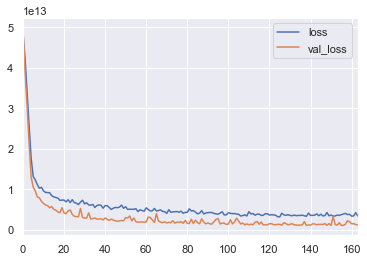

In [116]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [117]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [118]:
predictions = model.predict(X_test)

In [119]:
np.sqrt(mean_squared_error(y_test,predictions))

1093754.4852916545

In [120]:
explained_variance_score(y_test,predictions)

0.9774532247952445

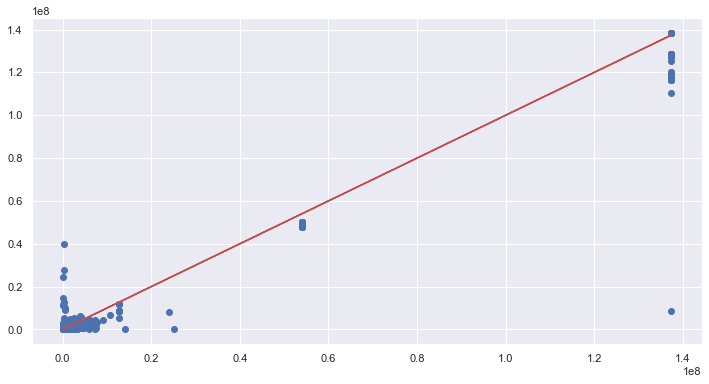

In [121]:
# Our predictions
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [122]:
errors = y_test.values.reshape(29390, 1) - predictions

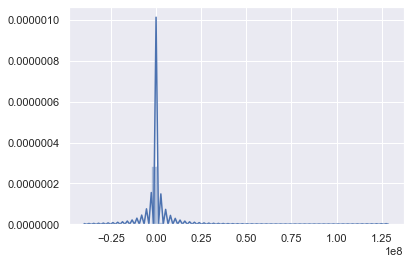

In [123]:
sns.distplot(errors)